# 592B Class 1.2 (01/25). First steps.

In this class, we'll get used to some basic things in Python and jupyter notebooks while learning to work with simple digital signals. Note: this notebook has been written using Python 3.6.

**Before you work through this notebook, you should:**

- *Familiarize yourself with python, jupyter notebooks, and basic plotting*: work through Software Carpentry's [Plotting and Programming in Python tutorial](http://swcarpentry.github.io/python-novice-gapminder/), up through Section 9 on plotting
- *Make sure you understand analog to digital conversion of speech signals*: review the Class 1.2 ([slides](https://ling592b.krisyu.org/slides/592B-S18_1-2.pdf)) and watch the [sampling video lecture](https://youtu.be/_iF-QNrZCU4), the [quantization video lecture](https://youtu.be/dtNr_pKK3po), and also the video lecture on [quantization and bits](https://youtu.be/K5VhfFoCIIs).
- *Familiarize yourself with version control with Git*: work through Software Carpentry's [Version Control with Git tutorial](https://swcarpentry.github.io/git-novice/)

---

## What is a notebook?

A juPyter notebook is described [here in the official docs](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html#what-is-the-jupyter-notebook):

> Notebook documents (or “notebooks”, all lower case) are documents produced by the Jupyter Notebook App, which contain both computer code (e.g. python) and rich text elements (paragraph, equations, figures, links, etc...). Notebook documents are both human-readable documents containing the analysis description and the results (figures, tables, etc..) as well as executable documents which can be run to perform data analysis.

Writing code in a notebook like this follows the principles of [literate programming](http://www.literateprogramming.com/knuthweb.pdf), coined and popularized by [Donald Knuth](http://www-cs-faculty.stanford.edu/~knuth/). The idea is that you don't want to write *unstructured code*: the *documentation* of the code is just as (or more important) than the code itself. As Donald Knuth [puts it](http://www.literateprogramming.com/knuthweb.pdf): 

> I believe that the time is ripe for significantly better documentation of programs, and that we can best achieve this by considering programs to be works of literature.  Hence, my title: “Literate Programming.”
Let us change our traditional attitude to the construction of programs: Instead of imagining that our main task is to instruct a computer what to do, let us concentrate rather on explaining to human beings what we want a computer to do.

## Importing libraries

See Software Carpentry's Plotting and Programming in Python tutorial section on [libraries](http://swcarpentry.github.io/python-novice-gapminder/06-libraries/). As it says there, we use the `import` command to "load a library module into a program’s memory." 

We are going to define some sinusoidal signals and then plot them. To do this, we'll load two commonly used libraries:

- `matplotlib` for plotting (see [Section 9 on plotting](http://swcarpentry.github.io/python-novice-gapminder/09-plotting/) from the Software Carpentry tutorial for more info
- `numpy` for doing numerical computations efficiently (see Software Carpentry's [Programming with Python tutorial](https://swcarpentry.github.io/python-novice-inflammation/) for more on `numpy`

We'll give the sub-library `matplotlib.pyplot` the alias `plt` and `numpy` the alias `np`.


In [4]:
import matplotlib.pyplot as plt 
import numpy as np 

# from __future__ import division  (if you're using Python 2.7+, to make float division the default)

## The mathematical definition of sinusoidal functions

A standard definition of a sinusoidal signal (i.e., a sine wave) is given as function of time $t$:

$$y(t) = A \sin (\omega t + \phi) $$

where:
- $A$ is the amplitude
- $\omega$ is the angular frequency, n.b., $\omega = 2\pi f$ (where $f$ is the frequency in cycles per second (Hertz or Hz))
- $\phi$ is the phase shift (or "offset", as Downey puts it).

In particular, let's define:
$$y_1(t) = \sin \left(880\pi t\right) $$
$$y_2(t) = 0.5 \sin \left(440\pi t + \frac{\pi}{2} \right) $$

***Exercise 1: What are $A$, $\omega$, $f$ and $\phi$ for $y_1(t)$ and $y_2(t)$?***

***Exercise 2: Recall that the *period* of a sinusoid (the duration of one cycle) is defined as $T = 1/f$. What is the period of $y_1(t)$? What is the period of $y_2(t)$?***

**Enter your code and/or answers for Exercise 1 and 2 in the cell below. Create additional cells if you need them.**

We've now mathematically defined two sinusoidal functions, $y_1(t)$ and $y_2(t)$. To represent these as sinusoidal signals in a computer though, we'll need to represent them **digitally**, in discrete time. We'll also need to define a finite duration for each signal, since computers only have finite memory: we can't define a signal that goes on forever!

## Digital signals

Note that our mathematical definitions of the sinusoidal signals $y_n(t)$ treat them as continuous-time, **analog** signals. This means, that in

$$y(t) = A \sin (\omega t + \phi) $$

time $t \in \mathbb{R}$, i.e., time $t$ can be any real-valued number. 
 
But as we discussed in Class 1.1 ([slides](https://ling592b.krisyu.org/slides/592B-S18_1-2.pdf)) and in the [sampling video lecture](https://youtu.be/_iF-QNrZCU4), when speech signals are represented in a computer they are represented as discrete-time, **digital** signals, as schematized in the [images](http://www.wlxt.uestc.edu.cn/wlxt/ncourse/dsp/web/kj/Chapter2/2.1%20Discrete-Time%20Signals%20Time-Domain%20Representation.htm) below.

In the image below, an analog signal $x_a(t)$ ($a$ for "analog") is sampled with a **sampling interval** of $T$ (and corresponding **sampling rate** or **sampling frequency** ($f=1/T$). 

*Note: caution here, we also used $T$ as the variable for a period of a sinusoid and $f$ as the frequency of a sinusoid earlier. To be absolutely clear, we'll add a subscript "s" when we're talking about sampling, "s" is for "sampling". So, let's call the sampling frequency $f_s$ and the sampling interval $T_s$.*

![Sampled continuous-time signal](http://www.wlxt.uestc.edu.cn/wlxt/ncourse/dsp/web/kj/Chapter2/2.1%20Discrete-Time%20Signals%20Time-Domain%20Representation_files/image004.jpg)

The sampled signal shown below, $x[n]$, is a discrete-time signal, where a sampled timepoint is represented as a sample $n$, where $n$ is an integer, $n \in \mathbb{Z}$.

![Discrete-time signal](http://www.wlxt.uestc.edu.cn/wlxt/ncourse/dsp/web/kj/Chapter2/2.1%20Discrete-Time%20Signals%20Time-Domain%20Representation_files/image002.jpg)

Recall we also discussed how a digital speech signal is *quantized* or "sampled in amplitude" as well as in time (See [quantization video lecture](https://youtu.be/dtNr_pKK3po) and also the video lecture on [quantization and bits](https://youtu.be/K5VhfFoCIIs)). We won't get more into that at the moment, and focus on sampling in time for now.

## Defining and plotting sinusoidal signals with `numpy` and `matplotlib`

We'll use `numpy` functions to help us define $y_1(t)$ and $y_2(t)$. Then we'll use `matplotlib` to plot them. 

### Defining the vector of sampled timepoints

First, we need to define the [vector](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/vectors/v/vector-introduction-linear-algebra) of sampled timepoints, $\bf x$. For example, in the figure above, this would be the sequence of numbers from -10 to 17, with a sampling interval $T_s$ of 1 (let's say $t$ is in seconds, so $T_s = 1s$):

$$\bf x = \langle -10, -9, -8, \ldots, -1, 0, 1, 2, 3, \ldots, 16, 17\rangle$$

Later when we work with Fourier transforms, we'll see that the total number of samples in a sampled signal is an important quantity. We also need to know the total number of samples for defining the vector to define $\bf x$ using `np.linspace`. So you should become fluent in computing this. If we know $T_s$ and start point $t_{start}$ and stop point $t_{stop}$ of the sampled timepoints, that's straightforward to determine. We just compute how long the duration of the signal is, which is $t_{stop} - t_{start}$. Then we know that is divided evenly into intervals of $T_s$. So if we do $(t_{stop} - t_{start})/T_s$, we get the total number of sampling intervals. To get the total number of sampled timepoints, we just add one to the total number of sampling intervals. 

(If this is still confusing to you, it might help if you think of a simple example, e.g., suppose we have the sampling timepoints $\langle 0, 1, 2 \rangle $. $t_{start}$ is 0s, $t_{stop}$ is 2s, and $T_s$ is 1s.  Then $(t_{stop} - t_{start})/T_s = (2-0)/1 = 2$. So there are 2 sampling intervals. If there are two sampling intervals, then there are three sampled timepoints. And that's right: there are indeed three--they are at 0, 1, and 2s.)

Doing this computation, in the code chunk below, gives us the answer that there are 28 sampled time points. 

**Note: in practice, with the sampling rates and signal durations you see in speech processing, this difference can be pretty neglible. So you will see researchers/textbooks which ignore this difference and don't bother to add one, e.g., they would get 27 samples for this example.**

In [59]:
Ts = 1 # sampling interval is 1 second
t_start = -10 # First sampled timepoint is at -10s (let's say that's 10s before the concert starts)
t_stop = 17 # Last sampled timepoint is at 17s (let's say this is 17s after the concert starts)

ns = (t_stop - t_start) / Ts + 1 # compute number of sampled timepoints
print(ns)



28.0


We can also think of this computation from the perspective of the sampling freqency $f_s$, recalling that $f_s = 1/T_s$. The sampling frequency is the number of samples taken per second. The duration $t_{stop} - t_{start}$ is how many seconds long the signal is. From this perspective, the total number of samples $n_s$ is the product of the duration and the sampling frequency plus one: $n_s = (t_{stop} - t_{start}) \cdot f_s + 1$. This computation is identical to the one immediately above, since $f_s = 1/T_s$. Why the plus 1? You need that plus 1 because we have to be sure to include the initial sampled timepoint at $t=0$.

In [60]:
fs = 1/Ts # sampling frequency

ns = (t_stop - t_start) * fs + 1
print(ns)

28.0


Now, let's get back to $y_1(t)$ and $y_2(t)$. Say we choose to have a sampling rate $f_s=100\,Hz$ for digitally representing $y_1(t)$ and $y_2(t)$. And let's say that the signals are each 10 seconds long, so let's have our sampled time points run from $t=0$ to $t=10$. That means we'll need to create a vector of values going from 0 to 10, with a sampling interval $T_s$ corresponding to $f_s=100$.

***Exercise 3: what is the corresponding sampling interval $T_s$, if the sampling rate $f_s$ is 100 Hz? How many sampled timepoints are there for $y_1(t)$? How many sampled timepoints are there for $y_2(t)$?***

**Enter your code and/or answers for Exercise 3 in the cell below. Create additional cells if you need them.**


We'll use Numpy's `linspace` function to define the vector $\bf{x}$ of sampled time points. We'll pass in the start time $t_{start}$, the stop time $t_{stop}$, as well as the total number of samples, $n_s$. 

In [ ]:
fs = 100 # define the sampling rate, f_s = 100 Hz

t_start = 0 # We start sampling at t = 0s
t_stop =  10 # We stop sampling at t = 10s

ns = (t_stop - t_start) * fs + 1

x = np.linspace(t_start, t_stop, ns)

Note: in this course, I'll use `np.linspace` as shown above, but you might also see people use Numpy's `np.arange` function to define the vector $\bf{x}$ of sampled time points. For completeness, I'll also show you how to do this: pass in the start time $t_{start}$, the stop time $t_{stop}$, as well as the sampling interval $T_s = 1/f_s$. One tricky bit is that `np.arange` generates values in the range $[t_{start},t_{stop})$, i.e., it doesn't include $t_{stop}$. So we'll pass in the stop time as $t_{stop} + 1/f_s$, so that the last value generated will be $t_{stop}$. (Some people won't bother to do this, so you might also see $t_{stop}$ passed in as the stop value).

In [68]:
#help(np.arange) #Uncomment this to get documentation on np.arange

fs = 100 # define the sampling rate, f_s = 100 Hz

t_start = 0 # We start sampling at t = 0s
t_stop =  10 # We stop sampling at t = 10s

ns = (t_stop - t_start) * fs + 1

x_arange = np.arange(t_start, t_stop + 1/fs, 1/fs) # Define vector of sampled time points


Hurray! We've defined the vector $\bf x$ of sampled time points for $y_1(t)$ and $y_2(t)$

***Exercise 4: use a python function to determine the length of $\bf x$. This is the number of sampled time points. Hint: if you don't know how to do this, make sure you review [this section](https://swcarpentry.github.io/python-novice-gapminder/02-variables/) in the Python plotting and programming tutorial. How does your answer here compare with your answer from Exercise 3?***

**Enter your code and/or answers for Exercise 4 in the cell below. Create additional cells if you need them.**


### Defining the amplitude values for the sampled time points

Now we need to define the amplitude values for the sampled time points. We can do this using Numpy's `np.sin` and `np.pi` functions and the vector of sampled timepoints we already defined, `x`.


In [51]:
f1 = 440 # frequency of y_1(t)
f2 = 220 # frequency of y_2(t)

y1 = np.sin(2*np.pi*f1*x)
y2 = np.sin(2*np.pi*f2*x)

In [ ]:
Equivalently, we could also use a list comprehension.

In [57]:

y1a = [ np.sin(2*np.pi*f1*(i/fs)) for i in np.arange(t_start,t_stop,fs)]


y1[0:4]
y1a[0:4]

y1a

np.arange(t_start,t_stop,fs)

array([0])

In [23]:
fs = 100 # sample rate 
f = 2 # the frequency of the signal

x = np.arange(fs) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = [ np.sin(2*np.pi*f1 * (i/fs)) for i in np.arange(fs)]

print(x)
print(y)


samples = np.arange(t * fs) / fs


f = 1.0 # Hz, signal frequency
5 fs = 5.0 # Hz, sampling rate (ie. >= 2*f)
6 t = arange(-1,1+1/fs,1/fs) # sample interval, symmetric
7 # for convenience later
8 x = sin(2*pi*f*t) 

test = [i/fs for i in np.arange(fs)]
len(test)
print(test)


1 from numpy import fft 2
3 Nf=64
4 fs=64
# N- DFT size
# sampling frequency
# one signal
# time-domain samples
# second nearby frequency
5 f=10
6 t = arange(0,1,1/fs)
7 deltaf = 1/2.
8
9 # keep x and y-axes on same respective scale
10 fig,ax = subplots(2,1,sharex=True,sharey=True)
11 fig.set_size_inches((8,3))
12
13 x=cos(2*pi*f*t) + cos(2*pi*(f+2)*t) # 2 Hz frequency difference
14 X = fft.fft(x,Nf)/sqrt(Nf)
15 ax[0].plot(linspace(0,fs,Nf),abs(X),’-o’)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[0.0, 0.12533323356430426, 0.24868988716485479, 0.36812455268467792, 0.48175367410171532, 0.58778525229247314, 0.68454710592868862, 0.77051324277578925, 0.84432792550201508, 0.90482705246601958, 0.95105651629515353, 0.98228725072868861, 0.99802672842827156, 0.99802672842827156, 0.98228725072868861, 0.95105651629515364, 0.90482705246601947, 0.84432792550201496, 0.77051324277578925, 0.68454710592868884, 0.58778525229247325, 0.4817536741017156, 0.36812455268467814, 0.24868988716485479, 0.12533323356430454, 1.2246467991473532e-16, -0.12533323356430431, -0.24868988716485502, -0.36812455268467836, -0.48175367410171499, -0.58778525229247303, -0.68454710592868873, -0.77051324277578936, -0.84432

In [105]:


fs = 100 # sample rate 
f = 2 # the frequency of the signal

x = np.arange(fs) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = [ np.sin(2*np.pi*f * (i/fs)) for i in np.arange(fs)]

#this instruction can only be used with IPython Notbook. 
% matplotlib inline
# showing the exact location of the smaples
plt.stem(x,y, 'r', )
plt.plot(x,y)

Let's plot these using ThinkDSP's wrapper functions for `matplotlib`!

**Exercise: What is the relation between $y_1(t)$ and $y_2(t)$?**

In [106]:
#from __future__ import print_function, division # I don't know why this is needed, so I commented it out

%matplotlib inline 

# "inline" lets us plot the functions right here in the notebook

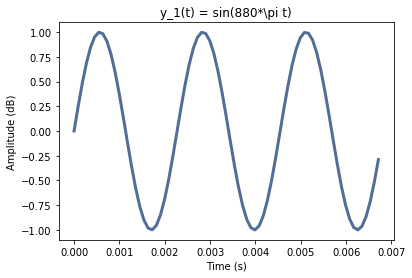

In [107]:
sin_sig.plot()
thinkplot.config(xlabel='Time (s)', ylabel='Amplitude (dB)', title='y_1(t) = sin(880*\pi t)')

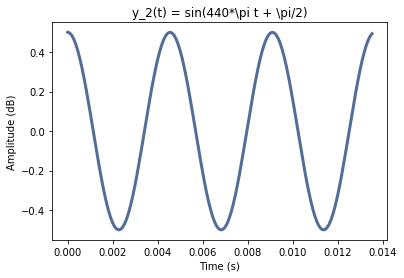

In [108]:
sin_sig2.plot()
thinkplot.config(xlabel='Time (s)', ylabel='Amplitude (dB)', title='y_2(t) = sin(440*\pi t + \pi/2)')

We can also define and plot a cosine wave $y_3(t)$:

$$y_3(t) = 0.5 \cos (440\pi t)$$

**Exercise: What is the relation between $y_2(t)$ and $y_3(t)$?**


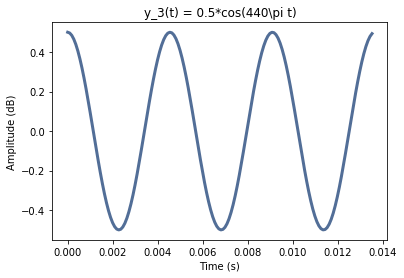

In [109]:
cos_sig = thinkdsp.CosSignal(freq=220, amp=0.5, offset=0)
cos_sig.plot()
thinkplot.config(xlabel='Time (s)', ylabel='Amplitude (dB)', title='y_3(t) = 0.5*cos(440\pi t)')

# Listening to digital audio signals

Using our defined sinusoidal signals, we can generate playable audio! Let's listen to `sin_sig` and `sin_sig2`. Note that `ThinkDSP`'s `make_wave()` asks us to set the `framerate` of the generated wave, which is another term for the sampling rate/frequency $f$. So if we set the `framerate` as 11025, that means that we have a sampling rate of 11025 samples per second, i.e., 11,025 Hz or 11.025 kHz.

**Exercise: what's the musical relation between the two audio signals? Do you know what musical note this is?**

**Exercise: What is the sampling interval $T$ if the sampling rate $f$ is 11025 Hz?**

In [110]:
wave_sin_sig = sin_sig.make_wave(duration=1, start=0, framerate=11025)

from IPython.display import Audio
audio_sin_sig = Audio(data=wave_sin_sig.ys, rate=wave_sin_sig.framerate)

audio_sin_sig



In [111]:
wave_sin_sig2 = sin_sig2.make_wave(duration=1, start=0, framerate=11025)

audio_sin_sig2 = Audio(data=wave_sin_sig2.ys, rate=wave_sin_sig2.framerate)

audio_sin_sig2

`ThinkDSP` has a wrapper function to make it a little easier to create waves. So we can also just invoke:

In [112]:
wave_sin_sig.make_audio()

`ThinkDSP` also provides a `write()` function for wave objects to write the audio signal out to a WAV file, as well as a `play_wave()` function to play WAV files. For example, we can write `wave_sin_sig` to file and play it.

**Warning: your mileage may vary with `play_wave()` depending on how you have audio configured on your system. Some of you might have `aplay` available as a player, in particular, if you are on Linux. On Mac OSX, I have `play` available, via [sox](http://sox.sourceforge.net/) so I'm using that. On Windows, you might set the player to Windows Media Player, perhaps like this:**

```python
player='C:\Program Files\Windows Media Player\wmplayer.exe'
```

**Or you could try [downloading sox](https://github.com/JoFrhwld/FAVE/wiki/Sox-on-Windows) and setting the player to wherever your sox executable is, e.g.,** 

```python
player ='C:\Program Files\sox-14-4-1'
```

In [115]:
wave_sin_sig.write('wave_sin_sig.wav')

# You may need to change what you set the `player` argument to, see text immediately above this code chunk.
thinkdsp.play_wave(filename='wave_sin_sig.wav', player='play')


Writing wave_sin_sig.wav


We can also read in WAV files with `read_wave()`. So let's read in an [American crow caw](http://www.birds.cornell.edu/physics/lessons/elementary/sounds/crow) from The Cornell Lab of Ornithology and play it. (I've downloaded this file as `crow.wav` in the current working directory).

In [114]:
wave_crow = thinkdsp.read_wave('crow.wav')

wave_crow.make_audio()
